In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,mean_absolute_error as mse,r2_score as r2
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [176]:
df=pd.read_csv('bse.csv')
df['Date']=pd.to_datetime(df['Date'])
df1=pd.read_csv('bse.csv')


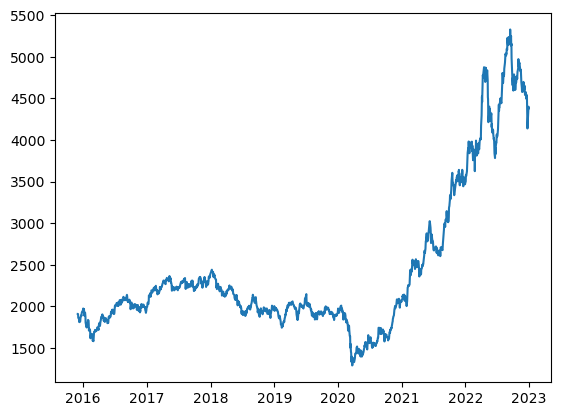

In [177]:
plt.plot(df.Date,df.Close)
plt.show()

In [178]:
df.describe()

,Open,High,Low,Close
count,1756.000000,1756.000000,1756.000000,1756.000000
mean,2443.448474,2463.196344,2418.545991,2439.720205
std,909.788720,921.121572,897.880537,908.999585
min,1295.410000,1328.750000,1275.070000,1290.650000
25%,1920.932500,1934.635000,1903.995000,1917.240000
50%,2080.705000,2096.425000,2064.140000,2076.270000
75%,2489.337500,2520.352500,2464.425000,2486.032500
max,5320.170000,5352.940000,5236.380000,5329.570000


In [179]:
df['Tommorow']=df['Close'].shift(-1)
#future prediction
fut_days=7
df['Prediction']=df[['Close']].shift(-fut_days)

df['target']=(df['Tommorow']>df['Close']).astype(int)

df

,Date,Open,High,Low,Close,Tommorow,Prediction,target
0,2015-12-01,1909.47,1919.85,1905.45,1910.23,1910.14,1837.87,0
1,2015-12-02,1911.01,1917.00,1898.92,1910.14,1897.27,1811.43,0
2,2015-12-03,1911.21,1916.71,1893.98,1897.27,1863.56,1817.79,0
3,2015-12-04,1895.89,1895.89,1861.26,1863.56,1864.98,1820.02,1
4,2015-12-07,1871.69,1873.50,1859.00,1864.98,1831.38,1843.72,0
...,...,...,...,...,...,...,...,...
1751,2022-12-26,4108.45,4295.84,4073.94,4271.32,4320.27,NaN,1
1752,2022-12-27,4316.36,4366.02,4284.97,4320.27,4369.82,NaN,1
1753,2022-12-28,4313.79,4398.54,4310.51,4369.82,4401.55,NaN,1
1754,2022-12-29,4352.56,4435.51,4309.01,4401.55,4381.29,NaN,0


In [180]:
y1=df['Close']
y1

0       1910.23
1       1910.14
2       1897.27
3       1863.56
4       1864.98
         ...   
1751    4271.32
1752    4320.27
1753    4369.82
1754    4401.55
1755    4381.29
Name: Close, Length: 1756, dtype: float64

In [181]:
X=np.array(df1.iloc[:,1:])[:-fut_days]
y=np.array(df['Prediction'])[:-fut_days]

In [182]:
print("X:",X)
print("\n y:",y)

X: [[1909.47 1919.85 1905.45 1910.23]
 [1911.01 1917.   1898.92 1910.14]
 [1911.21 1916.71 1893.98 1897.27]
 ...
 [4494.24 4550.03 4491.5  4540.28]
 [4526.39 4533.73 4485.4  4527.16]
 [4531.97 4556.5  4401.43 4418.53]]

 y: [1837.87 1811.43 1817.79 ... 4369.82 4401.55 4381.29]


In [183]:
x_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)



In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [185]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [186]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train, y_train)
pred=grid_GBR.predict(X_test)
print(r2(y_test,pred))


0.9878682795590662


In [187]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.9863064743852819

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.1}


In [188]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
pred=tree.predict(X_test)
print(r2(y_test,pred))

0.9751507967740135


In [189]:

lr=LinearRegression().fit(x_train,y_train)
pred=lr.predict(X_test)
print(r2(y_test,pred))

0.9879251676647242


In [190]:
# df.drop(['Date','Prediction','target',"T"],axis=1,inplace=True)
df1.drop(['Date'],axis=1,inplace=True)
df1.dropna(inplace=True)
xtest=np.array(df1.tail(fut_days))
xtest

array([[4422.12, 4448.3 , 4322.66, 4352.55],
       [4288.25, 4311.55, 4122.49, 4139.69],
       [4108.45, 4295.84, 4073.94, 4271.32],
       [4316.36, 4366.02, 4284.97, 4320.27],
       [4313.79, 4398.54, 4310.51, 4369.82],
       [4352.56, 4435.51, 4309.01, 4401.55],
       [4426.11, 4458.42, 4357.82, 4381.29]])

In [191]:
len(xtest)

7

In [192]:
gridp=grid_GBR.predict(xtest)
gridp

array([4391.93432821, 4240.54012391, 4294.91767384, 4304.76083969,
       4385.65320106, 4460.96113991, 4416.99780539])

In [193]:
lr_pred=lr.predict(xtest)
lr_pred


array([4346.93887447, 4115.28534427, 4297.523441  , 4336.81029418,
       4398.1448685 , 4416.37775594, 4385.7954693 ])

In [194]:
tpred=tree.predict(xtest)
tpred

array([4449.49, 4120.74, 4468.75, 4320.15, 4876.11, 4876.11, 4449.49])

C:\Users\xfini\AppData\Local\Temp\ipykernel_26268\2853140886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=gridp


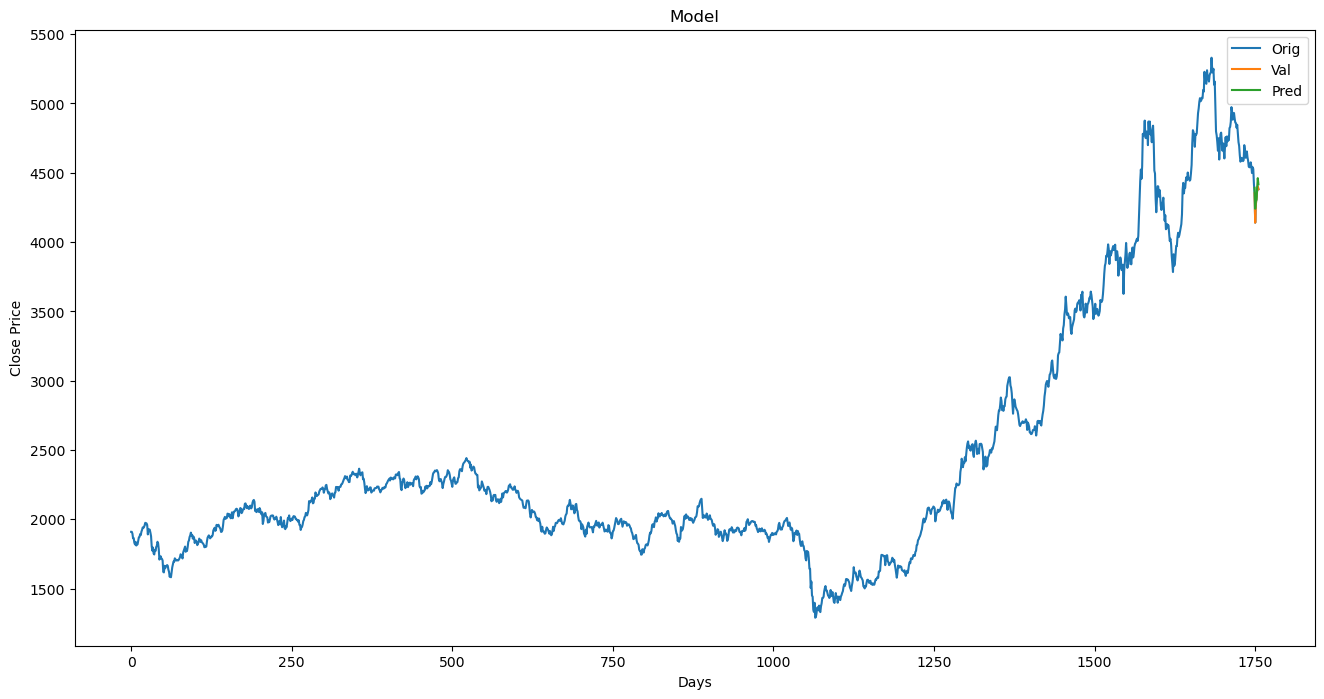

In [195]:
valid=df[X.shape[0]:]
valid['Predictions']=gridp

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()
